<center><h1><strong>DATA ANALYSIS</strong></h1></center>

Universidad Central del Ecuador<br>
Programación para dispositivos móviles<br>
Steven Erraez<br>

# 1. Pre Requisitos

In [129]:
# Instalación de las librerias o dependencias necesarias
!pip install pandas seaborn matplotlib scikit-learn

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Para graficación
from sklearn.cluster import KMeans # Para el modelamiento

# 2. Carga de la Data

In [154]:
# Ubicacion del archivo de datos
url = 'F1Championship.csv' # external url?

In [155]:
# Se carga el archvio csv con pandas DataFrame
data = pd.read_csv(url) # Recupera los datos en formato csv a tipo dataframe (Estructura de datos bidimensional)
data.head() # Visualiza los 5 primeros datos del dataframe

,Unnamed: 0,Season,Driver,Age,Chasis,Engine,Tyres,Poles,Wins,Podiums,Fastest laps,Points,% Points,Clinched[17],# of roundsremaining,Margin,% Margin
0,0,1950,Giuseppe Farina[21],44,Alfa Romeo,Alfa Romeo,P,2,3,3,3,30.0,83.333 (47.619),Round 7 of 7,0,3,10.000
1,1,1951,Juan Manuel Fangio[22],40,Alfa Romeo,Alfa Romeo,P,4,3,5,5,31.0,86.111 (51.389),Round 8 of 8,0,6,19.355
2,2,1952[lower-alpha 1],Alberto Ascari[24],34,Ferrari,Ferrari,F P,5,6,6,6,36.0,100.000 (74.306),Round 6 of 8,2,12,33.333
3,3,1954,Juan Manuel Fangio[22],43,Maserati[lower-alpha 2],Maserati,P,5,6,7,3,42.0,93.333 (70.547),Round 7 of 9,2,16.857,40.136
4,4,1955,Juan Manuel Fangio[22],44,Mercedes,Mercedes,C,3,4,5,3,40.0,88.889 (65.079),Round 6 of 7,1,16.5,41.250


# 3. Depuración de la data

In [157]:
#Limpiar y reformatear datos

data['Season'] = data['Season'].replace({'\[.*?\]':''}, regex=True).astype(int)
data['Driver'] = data['Driver'].replace({'\[.*?\]':''}, regex=True)
data['Age'] = data['Age'].replace({'\$':'',',':''}, regex = True).astype(int)
data['Chasis'] = data['Chasis'].replace({'\[.*?\]':''}, regex = True)
data['Engine'] = data['Engine'].replace({'\[.*?\]':''}, regex = True)
data['Poles'] = data['Poles'].replace({'\$':'',',':''}, regex = True).astype(int)
data['Wins'] = data['Wins'].replace({'\$':'',',':''}, regex = True).astype(int)
data['Podiums'] = data['Podiums'].replace({'\$':'',',':''}, regex = True).astype(int)
data['Fastest laps'] = data['Fastest laps'].replace({'\$':'',',':''}, regex = True).astype(int)
data['Points'] = data['Points'].replace({'\$':'',',':''}, regex = True).astype(float)
data['% Points'] = data['% Points'].replace({'\(.*?\)':'',',':''}, regex = True).astype(float)
data['# of roundsremaining'] = data['# of roundsremaining'].replace({'\$':'',',':''}, regex = True).astype(int)
data['Margin'] = data['Margin'].replace({'\$':'',',':'','\[.*?\]':''}, regex = True).astype(float)
data['% Margin'] = data['% Margin'].replace({'\$':'',',':'','\[.*?\]':''}, regex = True).astype(float)

In [158]:
# Inspeccionamos el tipo de dato de cada variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            73 non-null     int64  
 1   Season                73 non-null     int64  
 2   Driver                73 non-null     object 
 3   Age                   73 non-null     int64  
 4   Chasis                73 non-null     object 
 5   Engine                73 non-null     object 
 6   Tyres                 73 non-null     object 
 7   Poles                 73 non-null     int64  
 8   Wins                  73 non-null     int64  
 9   Podiums               73 non-null     int64  
 10  Fastest laps          73 non-null     int64  
 11  Points                73 non-null     float64
 12  % Points              73 non-null     float64
 13  Clinched[17]          73 non-null     object 
 14  # of roundsremaining  73 non-null     int64  
 15  Margin                73 

# 4. Inspeccion de la data

In [159]:
# Visualizamos el DataFrame
data

,Unnamed: 0,Season,Driver,Age,Chasis,Engine,Tyres,Poles,Wins,Podiums,Fastest laps,Points,% Points,Clinched[17],# of roundsremaining,Margin,% Margin
0,0,1950,Giuseppe Farina,44,Alfa Romeo,Alfa Romeo,P,2,3,3,3,30.0,83.333,Round 7 of 7,0,3.000,10.000
1,1,1951,Juan Manuel Fangio,40,Alfa Romeo,Alfa Romeo,P,4,3,5,5,31.0,86.111,Round 8 of 8,0,6.000,19.355
2,2,1952,Alberto Ascari,34,Ferrari,Ferrari,F P,5,6,6,6,36.0,100.000,Round 6 of 8,2,12.000,33.333
3,3,1954,Juan Manuel Fangio,43,Maserati,Maserati,P,5,6,7,3,42.0,93.333,Round 7 of 9,2,16.857,40.136
4,4,1955,Juan Manuel Fangio,44,Mercedes,Mercedes,C,3,4,5,3,40.0,88.889,Round 6 of 7,1,16.500,41.250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,68,2019,Lewis Hamilton,34,Mercedes,Mercedes,P,5,11,17,6,413.0,75.641,Round 19 of 21,2,87.000,21.065
69,69,2020,Lewis Hamilton,35,Mercedes,Mercedes,P,10,11,14,6,347.0,78.507,Round 14 of 17,3,124.000,35.735
70,70,2021,Max Verstappen,24,Red Bull,Honda,P,10,10,18,6,395.5,69.692,Round 22 of 22,0,8.000,2.023
71,71,2022,Max Verstappen,25,Red Bull,RBPT,P,7,15,17,5,454.0,76.174,Round 18 of 22,4,146.000,32.159


In [ ]:
# Remove unnecesary cols
# https://www.educative.io/answers/how-to-delete-a-column-in-pandas
# https://sparkbyexamples.com/pandas/pandas-drop-multiple-columns-by-index
# data.drop('a', inplace=True, axis=1)
data = data.drop(data.columns[[0]],axis = 1)
data

,Season,Driver,Age,Chasis,Engine,Tyres,Poles,Wins,Podiums,Fastest laps,Points,% Points,Clinched[17],# of roundsremaining,Margin,% Margin
0,1950,Giuseppe Farina,44,Alfa Romeo,Alfa Romeo,P,2,3,3,3,30.0,83.333,Round 7 of 7,0,3.000,10.000
1,1951,Juan Manuel Fangio,40,Alfa Romeo,Alfa Romeo,P,4,3,5,5,31.0,86.111,Round 8 of 8,0,6.000,19.355
2,1952,Alberto Ascari,34,Ferrari,Ferrari,F P,5,6,6,6,36.0,100.000,Round 6 of 8,2,12.000,33.333
3,1954,Juan Manuel Fangio,43,Maserati,Maserati,P,5,6,7,3,42.0,93.333,Round 7 of 9,2,16.857,40.136
4,1955,Juan Manuel Fangio,44,Mercedes,Mercedes,C,3,4,5,3,40.0,88.889,Round 6 of 7,1,16.500,41.250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,2019,Lewis Hamilton,34,Mercedes,Mercedes,P,5,11,17,6,413.0,75.641,Round 19 of 21,2,87.000,21.065
69,2020,Lewis Hamilton,35,Mercedes,Mercedes,P,10,11,14,6,347.0,78.507,Round 14 of 17,3,124.000,35.735
70,2021,Max Verstappen,24,Red Bull,Honda,P,10,10,18,6,395.5,69.692,Round 22 of 22,0,8.000,2.023
71,2022,Max Verstappen,25,Red Bull,RBPT,P,7,15,17,5,454.0,76.174,Round 18 of 22,4,146.000,32.159


In [ ]:
# Inspeccionamos el tipo de dato de cada variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Season                73 non-null     int64  
 1   Driver                73 non-null     object 
 2   Age                   73 non-null     int64  
 3   Chasis                73 non-null     object 
 4   Engine                73 non-null     object 
 5   Tyres                 73 non-null     object 
 6   Poles                 73 non-null     int64  
 7   Wins                  73 non-null     int64  
 8   Podiums               73 non-null     int64  
 9   Fastest laps          73 non-null     int64  
 10  Points                73 non-null     float64
 11  % Points              73 non-null     float64
 12  Clinched[17]          73 non-null     object 
 13  # of roundsremaining  73 non-null     int64  
 14  Margin                73 non-null     float64
 15  % Margin              73 

In [ ]:
# Realizamos una descripción de los estadísticos básicos para comprender la data
data.describe()

,Season,Age,Poles,Wins,Podiums,Fastest laps,Points,% Points,# of roundsremaining,Margin,% Margin
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,1986.958904,31.575342,5.931507,6.356164,10.054795,3.972603,131.917808,71.067644,1.356164,27.922699,19.502781
std,21.286693,5.449051,3.742878,3.409015,4.061644,2.403543,132.329660,14.204817,1.484829,45.907135,14.736324
min,1950.000000,23.000000,0.000000,1.000000,3.000000,0.000000,30.000000,44.444000,0.000000,0.500000,0.694000
25%,1969.000000,28.000000,3.000000,4.000000,7.000000,2.000000,51.000000,60.000000,0.000000,4.000000,5.455000
50%,1987.000000,31.000000,6.000000,6.000000,10.000000,3.000000,73.000000,72.727000,1.000000,13.000000,19.355000
75%,2005.000000,34.000000,9.000000,8.000000,12.000000,6.000000,123.000000,78.788000,2.000000,26.000000,30.233000
max,2023.000000,46.000000,15.000000,19.000000,21.000000,10.000000,575.000000,100.000000,6.000000,290.000000,50.435000


# 5. Análisis de la Data

In [ ]:
data[['Season','Age','Tyres','Poles','Wins','Podiums','Fastest laps','Points','% Points','# of roundsremaining','Margin','% Margin']].corr().style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-122-1a9871e61eb6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data[['Season','Age','Tyres','Poles','Wins','Podiums','Fastest laps','Points','% Points','# of roundsremaining','Margin','% Margin']].corr().style.background_gradient(cmap='coolwarm').set_precision(2)
<ipython-input-122-1a9871e61eb6>:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  data[['Season','Age','Tyres','Poles','Wins','Podiums','Fastest laps','Points','% Points','# of roundsremaining','Margin','% Margin']].corr().style.background_gradient(cmap='coolwarm').set_precision(2)


,Season,Age,Poles,Wins,Podiums,Fastest laps,Points,% Points,# of roundsremaining,Margin,% Margin
Season,1.00,-0.50,0.57,0.73,0.87,0.45,0.79,-0.20,0.21,0.51,-0.06
Age,-0.50,1.00,-0.20,-0.27,-0.41,-0.06,-0.34,0.26,0.01,-0.17,0.22
Poles,0.57,-0.20,1.00,0.66,0.60,0.40,0.54,0.05,0.38,0.45,0.23
Wins,0.73,-0.27,0.66,1.00,0.84,0.62,0.80,0.26,0.61,0.80,0.41
Podiums,0.87,-0.41,0.60,0.84,1.00,0.55,0.84,0.11,0.44,0.66,0.15
Fastest laps,0.45,-0.06,0.40,0.62,0.55,1.00,0.48,0.31,0.36,0.41,0.19
Points,0.79,-0.34,0.54,0.80,0.84,0.48,1.00,0.15,0.34,0.76,0.11
% Points,-0.20,0.26,0.05,0.26,0.11,0.31,0.15,1.00,0.45,0.30,0.42
# of roundsremaining,0.21,0.01,0.38,0.61,0.44,0.36,0.34,0.45,1.00,0.64,0.74
Margin,0.51,-0.17,0.45,0.80,0.66,0.41,0.76,0.30,0.64,1.00,0.54


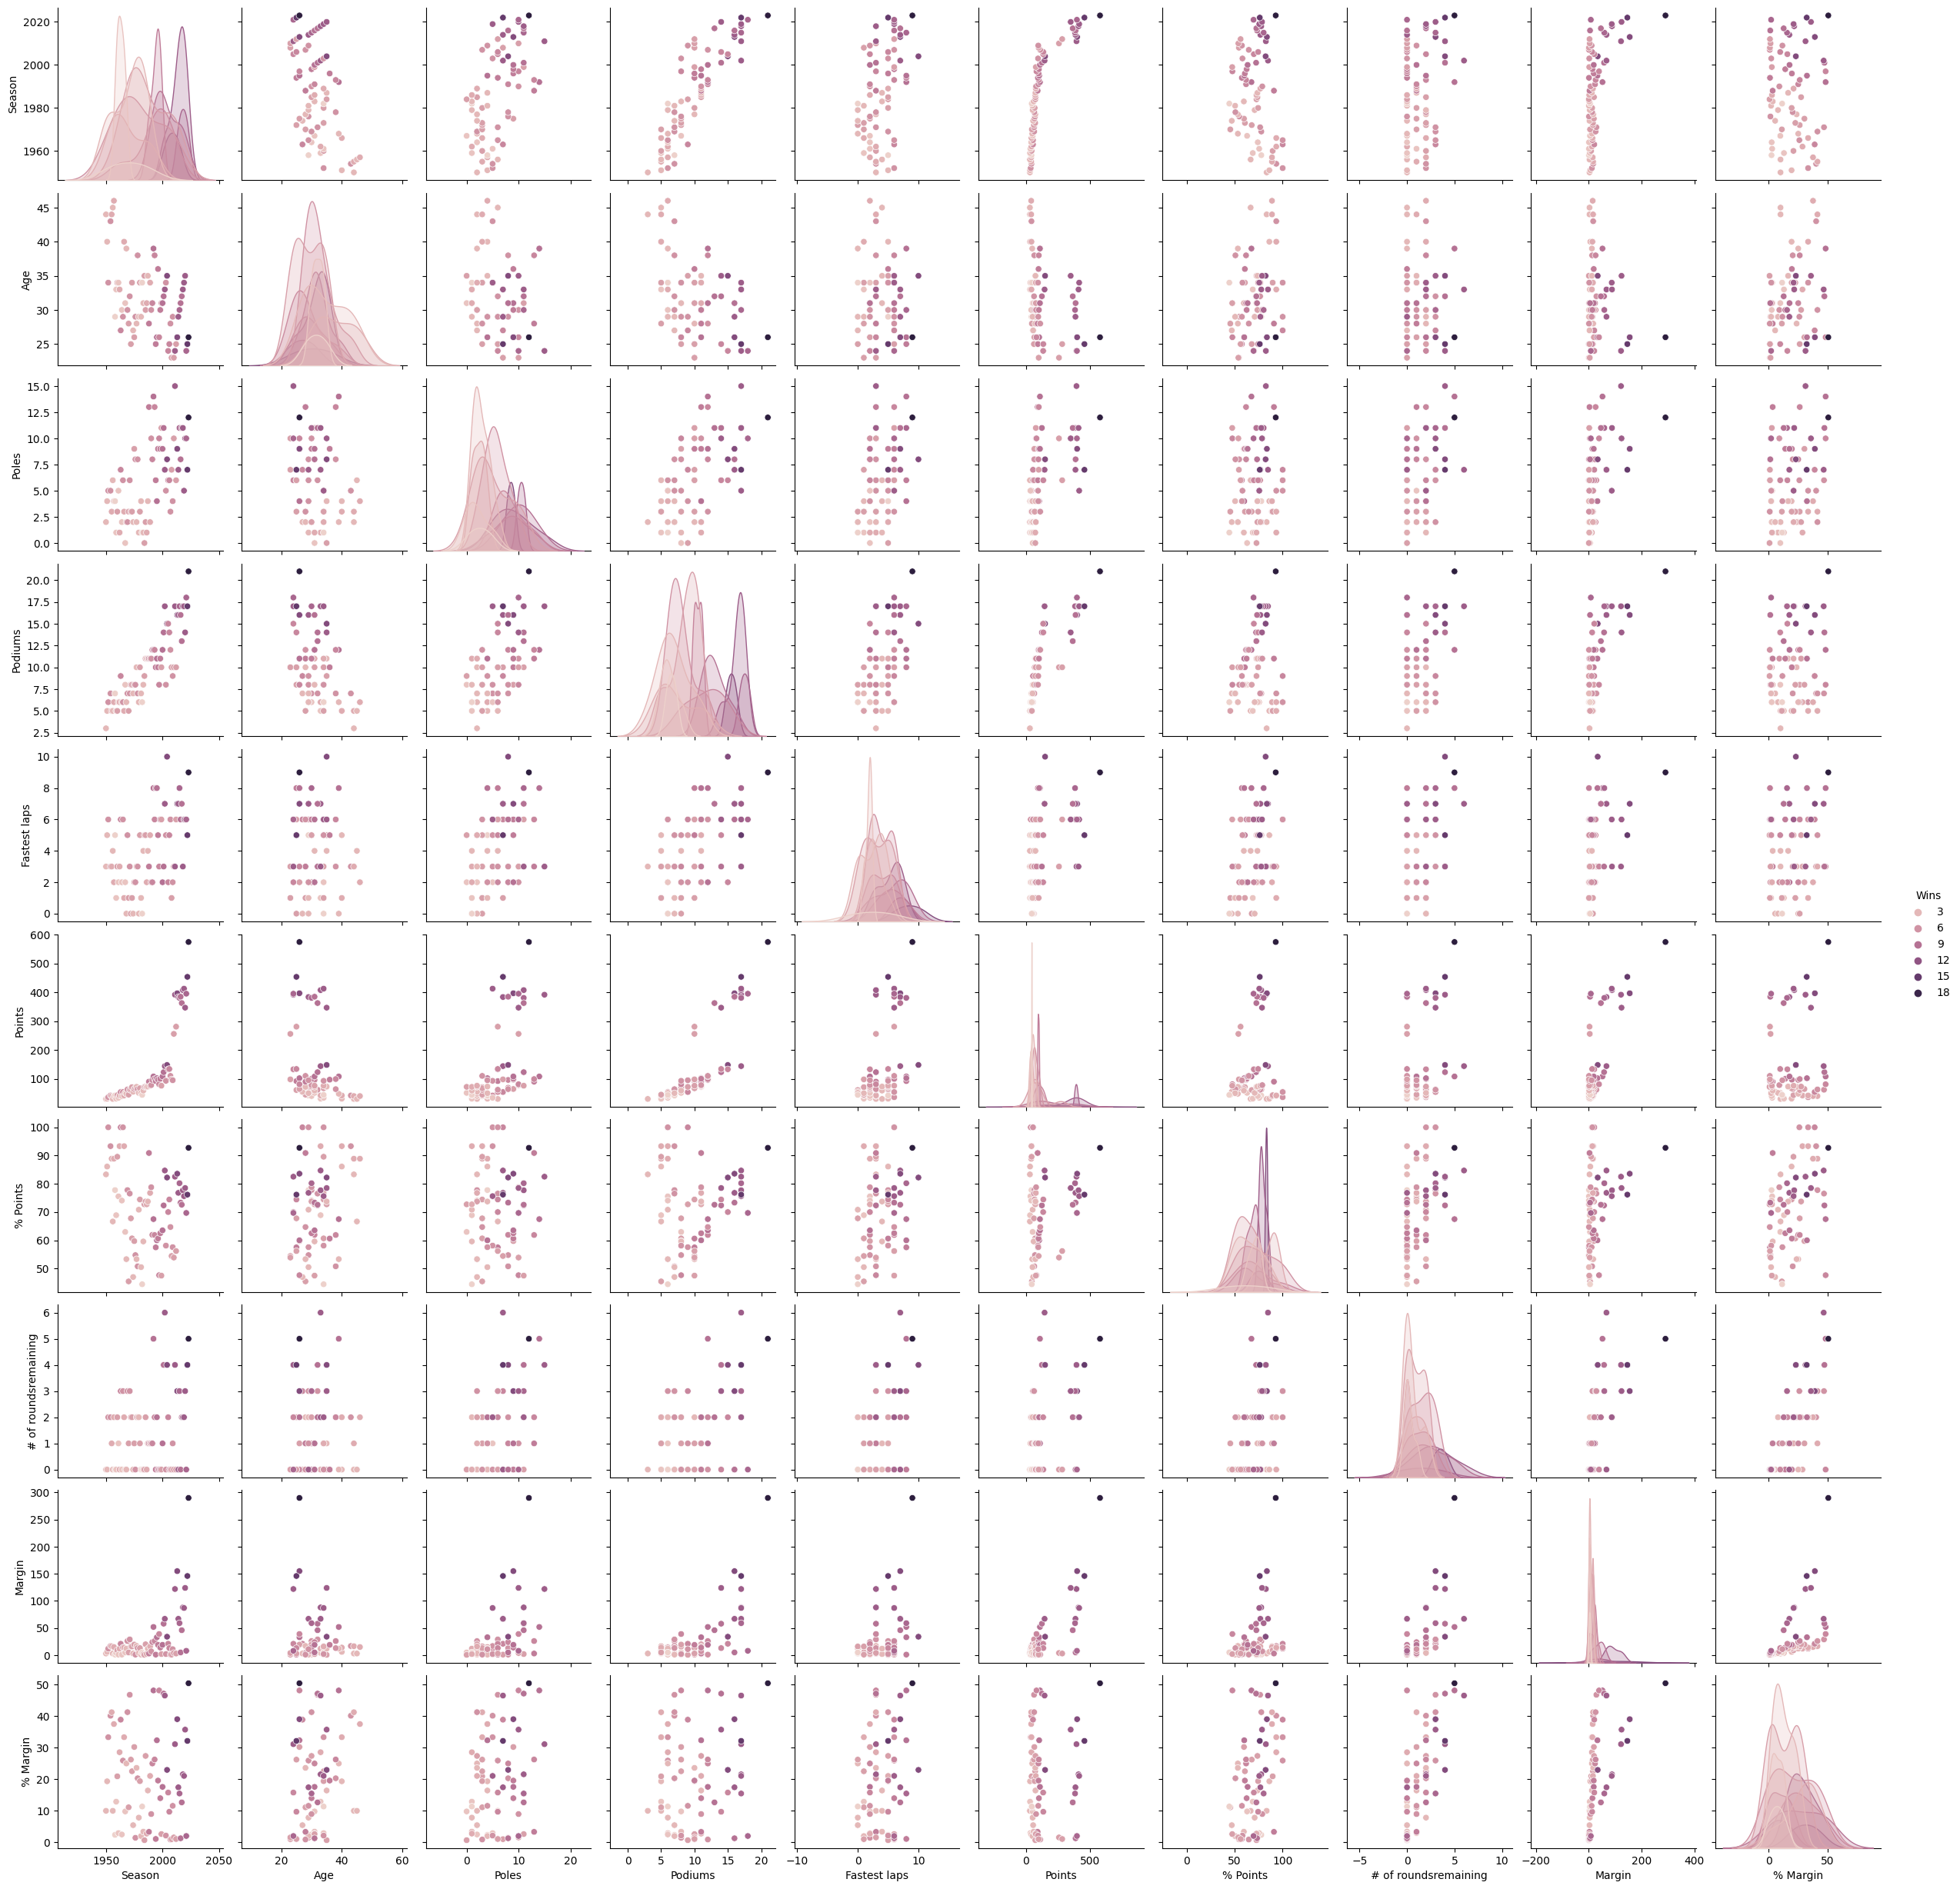

In [ ]:
# Grafica de correlaciones respecto a los Estados
sns.pairplot(data,hue="Wins")

In [ ]:
# Seleccción de variables significativas
sel_data = data[['Age', 'Poles','Podiums','Points','Margin']]
sel_data

,Age,Poles,Podiums,Points,Margin
0,44,2,3,30.0,3.000
1,40,4,5,31.0,6.000
2,34,5,6,36.0,12.000
3,43,5,7,42.0,16.857
4,44,3,5,40.0,16.500
...,...,...,...,...,...
68,34,5,17,413.0,87.000
69,35,10,14,347.0,124.000
70,24,10,18,395.5,8.000
71,25,7,17,454.0,146.000


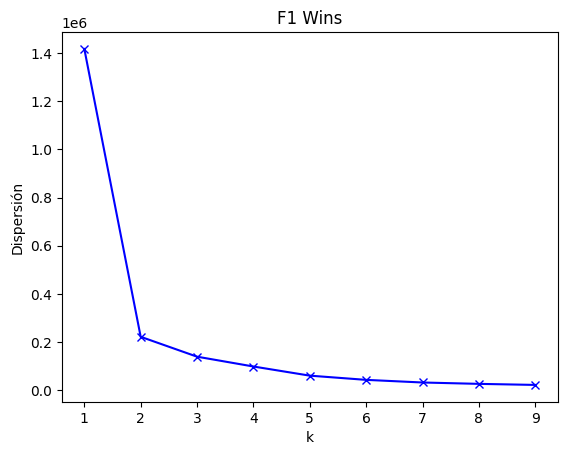

In [ ]:
# Analsis de Dispersión por método de Codo
def plot_dispersion(x, figure_name, max_k = 10, n_init = 10):
    inertia = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters = k, n_init = n_init).fit(x)
        inertia.append(kmeans.inertia_)

    plt.plot(range(1, max_k), inertia, 'bx-')
    plt.xlabel('k')
    plt.ylabel(u'Dispersión')
    plt.title(figure_name)

plot_dispersion(sel_data, 'F1 Wins')